## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt

wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

In [12]:
import requests

url = "https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz"
filename = "LeMonde2003_9classes.csv.gz"

response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)

print("Téléchargement terminé : ", filename)

import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("LeMonde2003_9classes.csv.gz")
print("Nombre d'articles :", len(df)) 


Téléchargement terminé :  LeMonde2003_9classes.csv.gz
Nombre d'articles : 30165


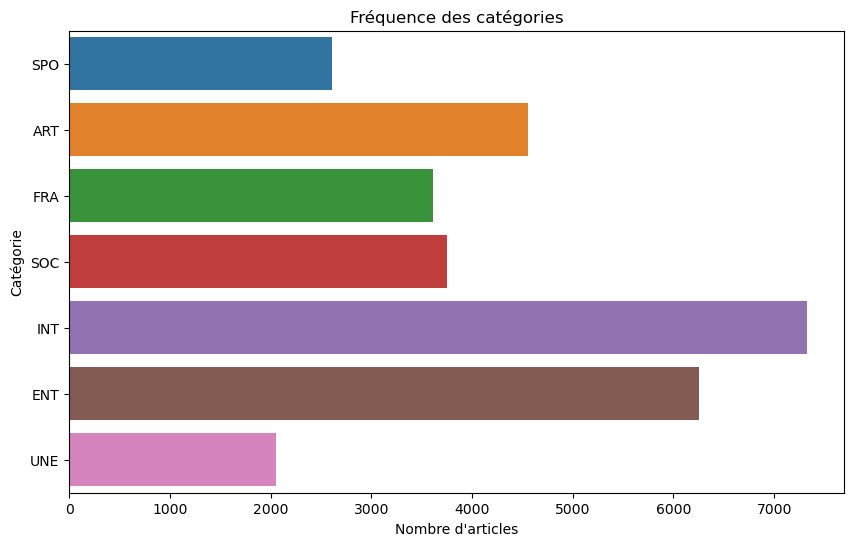

In [13]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category')
plt.title('Fréquence des catégories')
plt.xlabel('Nombre d\'articles')
plt.ylabel('Catégorie')
plt.show()

In [14]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
sample_articles = df.sample(5)
for index, row in sample_articles.iterrows():
    print("Catégorie :", row['category'])
    print("Texte de l'article :", row['text'])
    print("\n")


Catégorie : SOC
Texte de l'article : un bilan provisoire fait état d'une baisse de 30 de tués sur les routes en novembre par rapport au même mois de l'année 2002 a indiqué jeudi 4 décembre le ministère de l'intérieur selon les données préliminaires entre 1 600 et 1 700 personnes auraient été tuées en moins cette année


Catégorie : SOC
Texte de l'article : l'assistance publique-hôpitaux de paris ap-hp poursuivie pour homicide involontaire après le suicide d'un patient le 21 janvier 1999 a bénéficié mardi 4 novembre d'une relaxe le jeune homme qui souffrait de troubles psychiatriques s'était jeté du haut d'un escalier de secours de dix étages à l'hôpital saint-antoine dans le 12e arrondissement de paris le tribunal a suivi les réquisitions du parquet qui le 7 octobre avait estimé que les normes de sécurité avaient été respectées par l'établissement


Catégorie : ENT
Texte de l'article : selon la ministre déléguée à l'industrie nicole fontaine la direction de l'usine stmicroelectronics d

In [18]:

from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

stop_words_file = "https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt"
stop_words = [x.strip() for x in requests.get(stop_words_file).text.split('\n')]

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    text_cat = " ".join(df[df['category'] == cat]['text'])
    
    # Créer un nuage de mots pour cette catégorie
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_cat)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Nuage de mots pour la catégorie " + cat)
    plt.axis('off')
    plt.show()





SyntaxError: invalid syntax (1688680215.py, line 1)

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [19]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
dev_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE

vectorizer = CountVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(train_data['text'])
X_dev_vec = vectorizer.transform(dev_data['text'])
X_test_vec = vectorizer.transform(test_data['text'])
y_train = train_data['category']
y_dev = dev_data['category']
y_test = test_data['category']




In [29]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train_vec)
y_dev_pred = classifier.predict(X_dev_vec)
y_test_pred = classifier.predict(X_test_vec)

from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Précision sur l'ensemble d'entraînement:", train_accuracy)
print("Précision sur l'ensemble de développement:", dev_accuracy)
print("Précision sur l'ensemble de test:", test_accuracy)


Précision sur l'ensemble d'entraînement: 0.7285347256754516
Précision sur l'ensemble de développement: 0.7141909814323607
Précision sur l'ensemble de test: 0.7305270135896585


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer


train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
dev_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)


vectorizer = TfidfVectorizer(max_features=1000)

X_train = vectorizer.fit_transform(train_data['text'])
X_dev = vectorizer.transform(dev_data['text'])
X_test = vectorizer.transform(test_data['text'])

y_train = train_data['category']
y_dev = dev_data['category']
y_test = test_data['category']

classifier = MultinomialNB()

classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

# Afficher la précision de classification
print("Précision sur l'ensemble de test avec TF-IDF:", test_accuracy)

NameError: name 'TfidfVectorizer' is not defined

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [36]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


report = classification_report(y_test, y_test_pred)

print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

         ART       0.79      0.83      0.81       466
         ENT       0.77      0.84      0.80       598
         FRA       0.63      0.69      0.66       357
         INT       0.84      0.75      0.79       750
         SOC       0.60      0.70      0.65       364
         SPO       0.89      0.82      0.85       278
         UNE       0.17      0.11      0.14       204

    accuracy                           0.73      3017
   macro avg       0.67      0.68      0.67      3017
weighted avg       0.72      0.73      0.73      3017



NameError: name 'confusion_matrix' is not defined

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

C:\Users\marie\AppData\Local\Temp\ipykernel_12400\3401307237.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = df_filtered['category'].replace({'FRANCE': 'SOCIETE'})


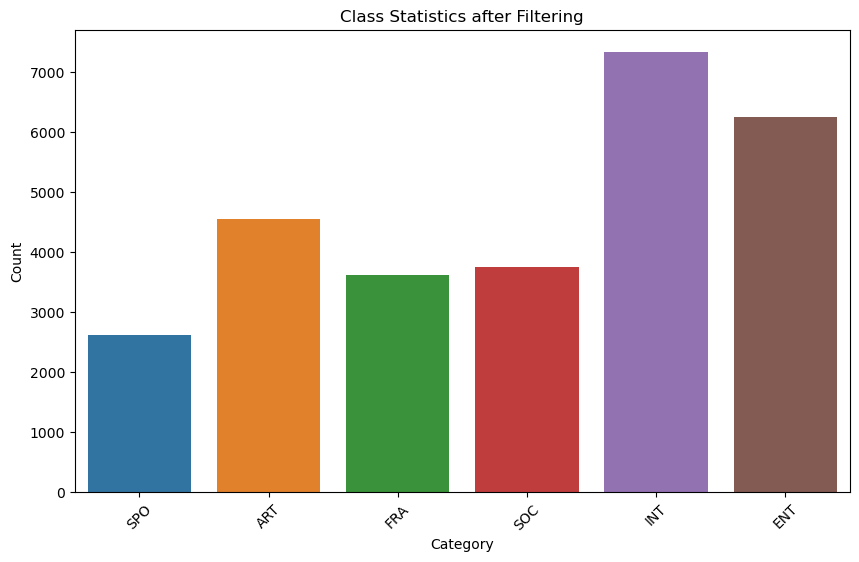

Train set size: 22488
Dev set size: 2811
Test set size: 2811
Accuracy on train set: 0.7994041266453219
Accuracy on dev set: 0.7890430451796514
Accuracy on test set: 0.7933119886161508


NameError: name 'confusion_matrix' is not defined

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Load the original dataset
df = pd.read_csv("LeMonde2003_9classes.csv.gz")

# Filter out the 'UNE' class
df_filtered = df[df['category'] != 'UNE']

# Merge 'FRANCE' and 'SOCIETE' classes
df_filtered['category'] = df_filtered['category'].replace({'FRANCE': 'SOCIETE'})

# Plot the statistics of classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='category')
plt.title('Class Statistics after Filtering')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Make the splits and print the sizes for checking
train_data, test_data = train_test_split(df_filtered, test_size=0.2, random_state=42)
dev_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

print("Train set size:", len(train_data))
print("Dev set size:", len(dev_data))
print("Test set size:", len(test_data))

# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

X_train = vectorizer.fit_transform(train_data['text'])
X_dev = vectorizer.transform(dev_data['text'])
X_test = vectorizer.transform(test_data['text'])

y_train = train_data['category']
y_dev = dev_data['category']
y_test = test_data['category']

# Train MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Print accuracy
train_accuracy = classifier.score(X_train, y_train)
dev_accuracy = classifier.score(X_dev, y_dev)
test_accuracy = classifier.score(X_test, y_test)

print("Accuracy on train set:", train_accuracy)
print("Accuracy on dev set:", dev_accuracy)
print("Accuracy on test set:", test_accuracy)

# Print confusion matrix
y_test_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:")
print(conf_matrix)

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [ ]:
from transformers import pipeline


model_name = "t5-base"
classifier = pipeline("zero-shot-classification", model=model_name)

classes = ["politics", "economics", "sports", "culture", "technology"]

article_text = "le fc barcelone est un géant du football européen depuis sa création en 1899 il a gagné 16 fois le championnat national 24 fois la coupe d'espagne et 8 coupes d'europe comme tous les supporteurs du monde ses socios savent qu'un club aussi prestigieux soit-il ne peut pas gagner tous les ans une année blanche est tolérée mais quatre de suite non c'est pourtant la situation dans laquelle se trouve aujourd'hui le barça dont le dernier trophée un titre de champion remonte à 1999 et dont la saison la plus récente s'est terminée sur un échec historique avec une 7e place en liga la crise permanente qui secoue le fc barcelone depuis quatre ans donne une idée de la tâche qui attend ronaldinho arrivé dans la capitale catalane samedi 19 juillet pour y signer un contrat de cinq ans à raison de 4,5 millions d'euros de salaire annuel le footballeur brésilien de 23 ans a été accueilli à la manière d'un messie chacun de ses faits et gestes étant raconté décortiqué et analysé par des nuées de reporters locaux ronaldinho arrivant à l'aéroport ronaldinho se rendant au siège du club ronaldinho dormant dans tel palace ronaldinho passant avec succès sa visite médicale etc rien n'a échappé aux barcelonais amateurs ou non de ballon rond une bonne opération ronaldinho a aussi donné ses premières interviewes en exclusivité bien sûr à la chaîne et au site internet du club dans un épanchement de béatitude l'ancien joueur du paris-saint-germain y livre ses premières confidences ici au barça il y a tout ce qu'un joueur peut désirer ou rechercher il s'agit d'un grand club où sont passés beaucoup de joueurs qui" 

result = classifier(article_text, classes)

print("Predicted Class:", result['labels'][0])
print("Confidence Scores:", result['scores'][0])


D:\Anaconda\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\marie\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
